In [1]:
# 1. Importer les bibliothèques
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("winequality-red.csv", sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# Separation des données
X = df.drop("quality", axis= 1)
y= df["quality"]

In [4]:
# 4. Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# 5. Appliquer la PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [6]:
# 6. Examiner la variance expliquée
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
print("\nVariance expliquée par chaque composante :")
for i, var in enumerate(explained_variance):
    print(f"Composante {i+1}: {var:.3f} (cumulée: {cumulative_variance[i]:.3f})")


Variance expliquée par chaque composante :
Composante 1: 0.282 (cumulée: 0.282)
Composante 2: 0.175 (cumulée: 0.457)
Composante 3: 0.141 (cumulée: 0.598)
Composante 4: 0.110 (cumulée: 0.708)
Composante 5: 0.087 (cumulée: 0.795)
Composante 6: 0.060 (cumulée: 0.855)
Composante 7: 0.053 (cumulée: 0.908)
Composante 8: 0.038 (cumulée: 0.947)
Composante 9: 0.031 (cumulée: 0.978)
Composante 10: 0.016 (cumulée: 0.995)
Composante 11: 0.005 (cumulée: 1.000)


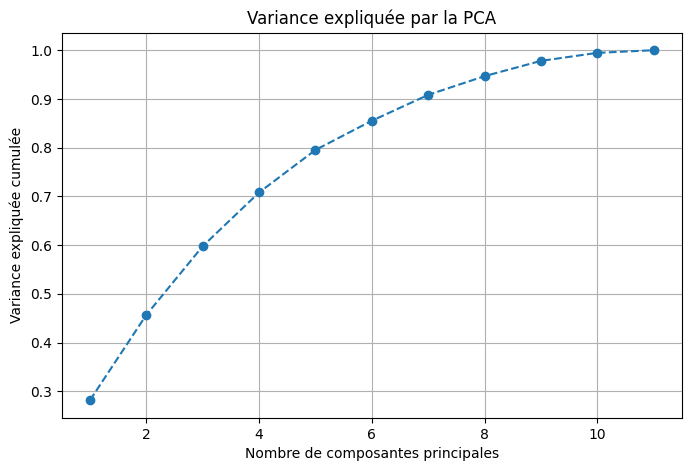

In [7]:
# 7. Tracer la variance expliquée cumulative
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance expliquée cumulée")
plt.title("Variance expliquée par la PCA")
plt.grid(True)
plt.show()


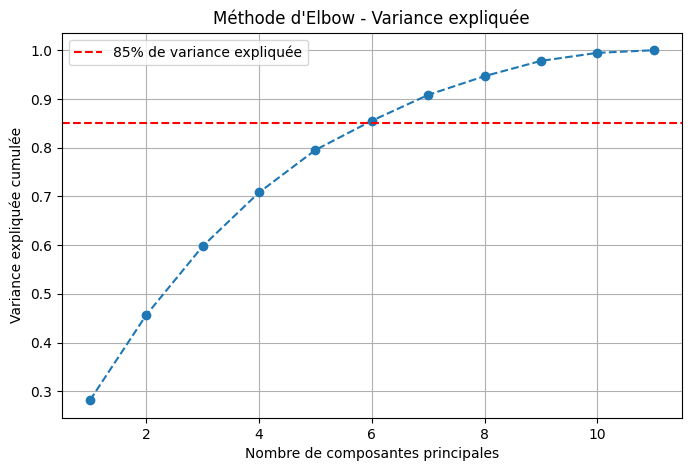

In [8]:
# Trace la variance expliquée cumulative (methode d'Elbow)
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance expliquée cumulée")
plt.title("Méthode d'Elbow - Variance expliquée")
plt.grid(True)

# Optionnel : ajouter une ligne horizontale (par ex. 85%)
plt.axhline(y=0.85, color='r', linestyle='--', label='85% de variance expliquée')

plt.legend()
plt.show()

In [9]:
# 8. Projeter les données sur les 2 premières composantes
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

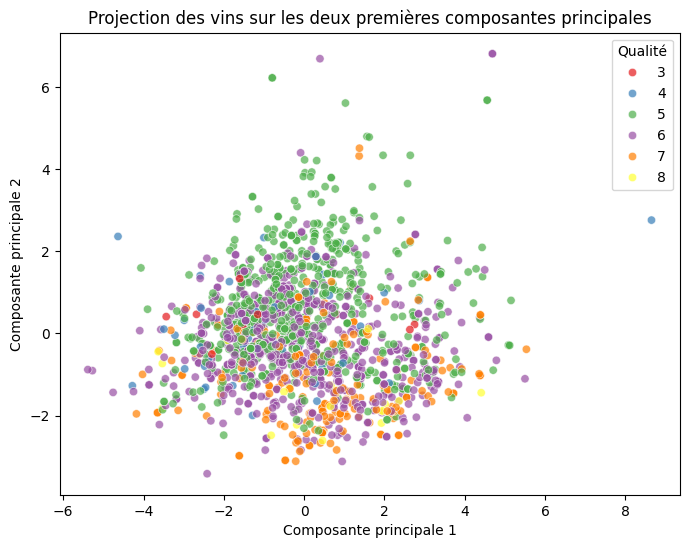

In [10]:
# 9. Visualiser les points colorés par qualité
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca_2[:,0], y=X_pca_2[:,1], hue=y, palette="Set1", alpha=0.7)
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.title("Projection des vins sur les deux premières composantes principales")
plt.legend(title="Qualité")
plt.show()

In [11]:
# 10. Afficher les poids des variables dans les deux premières composantes
loadings = pca_2.components_.T
columns = X.columns
pc1_loadings = pd.Series(loadings[:,0], index=columns)
pc2_loadings = pd.Series(loadings[:,1], index=columns)

print("\nContributions des variables à PC1 :")
print(pc1_loadings.sort_values(ascending=False))

print("\nContributions des variables à PC2 :")
print(pc2_loadings.sort_values(ascending=False))


Contributions des variables à PC1 :
fixed acidity           0.489314
citric acid             0.463632
density                 0.395353
sulphates               0.242921
chlorides               0.212247
residual sugar          0.146107
total sulfur dioxide    0.023575
free sulfur dioxide    -0.036158
alcohol                -0.113232
volatile acidity       -0.238584
pH                     -0.438520
dtype: float64

Contributions des variables à PC2 :
total sulfur dioxide    0.569487
free sulfur dioxide     0.513567
volatile acidity        0.274930
residual sugar          0.272080
density                 0.233575
chlorides               0.148052
pH                      0.006711
sulphates              -0.037554
fixed acidity          -0.110503
citric acid            -0.151791
alcohol                -0.386181
dtype: float64
